#### Autoencoders

Autoencoder is used for learning latent space representations of data.Input image first goes through an encoder network which creates a latent space representation of the input. This latent space representation is then passed through a decoder network which reconstructs the input image.

We are interested in the latent space representation of th einput rather than the reconstructed image.







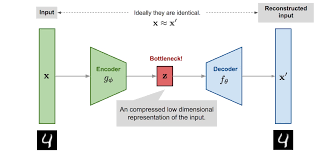

In [1]:
from IPython.display import Image
Image(filename='notebook_images/autoencoders.png')


We want to minimize the difference between the input and the reconstructed image or in other words we want to minimize the reconstruction error which is usually given by MSE

There are few things we need to consider:

1.We do not want our netwrok to learn just copy the original image.That is why neurons in the latent space should be less than the number of pixels in the input image or in other words dimension of our input data.

2.If we use linear asctivation functions our network apporoximates PCA.Since we are reducing the dimensionality to no of neurons in the bottleneck layer it will learn to give weights to most important features of the input data.Just like PCA gives importance to maximum variance direction.We can think of it as first non linearly transforming the input data then reducing the dimensionality linearly like PCA

3.In order to learning and not copying our encoders and decoders should be shallow networks.

4.We still want our network to not be overconfident in some neurons so we need to apply latent space regularization which is intuitevely similar to dropout.





#### Regularization

Similar to eliminating some of the neurons in the bottleneck with dropout we want someofthe activations to be close to zero.

$L_{sparse}= L_{vanilla} + \Omega(h)$

We define $\hat{p}$ as the average activation of the hidden layer.

and $p$ as the desired average activation.So if we pick $p=0.05$ we want the average activation of the hidden layer to be close to 0.05.Which is close to eliminating it.

And if we think of whether we use those neurons or not we can think of it as sampling from a Bernoulli distribution with probability $p$ and $\hat{p}$.

Thats why we can use KL divergence to measure the difference between the two distributions.

$\Omega(h) =KL(p||p_{hat})$

$\Omega(h) = \sum_{j=1}^{n_h} (p_j \log \frac{p_j}{\hat{p}_j} + (1-p_j) \log \frac{1-p_j}{1-\hat{p}_j})$






#### Denoising Autoencoders

We can also add a noise to the input data and then train our network to denoise the input data.Which forces the network to learn the underlying structure of the data.

#### Variational Autoencoders

Unlike autoencoders just learning the latent space representation of the input data,VAEs learn to generate new data from the latent space.The reason we can not just use latent space of the AEs is that they are not organized so that taking a point near some other point will not result in close decoded image.We need organized latent space and that is where VAEs are useful

Assume we have a data space denoted as $p(x)$ and latent space $p(z)$

Then we would also have $p(z|x)$ which is the probability of latent variable given data and $p(x|z)$ which is probability of data given latent variable

So if we sample from posterior which is $p(z|x)$ and use it to get back to input space we would have new generated data

Problem is that we don't know p(z) so we need to assume $p(z) \sim \mathcal{N}(0,1)$

we also assume that $p(z|x)$ is Gaussian with parameters $p(z|x) \sim \mathcal{N}(\mu,\sigma)$ which we are trying to learn in the network.



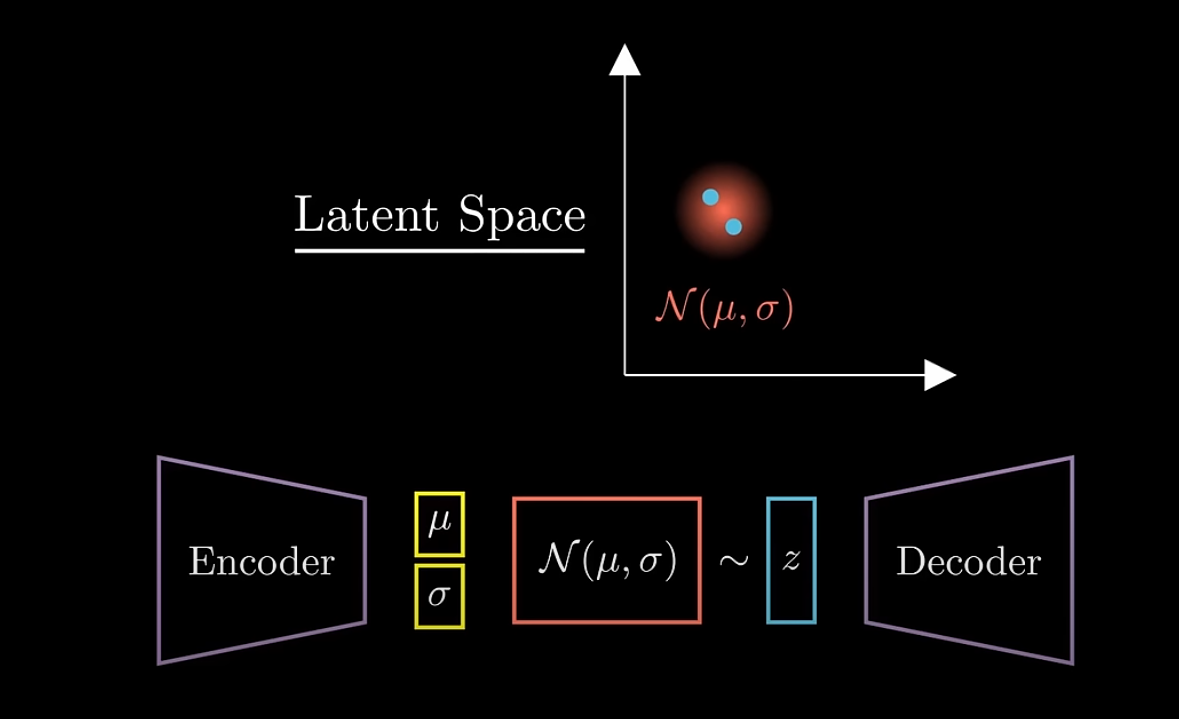

In [3]:
from IPython.display import Image
Image(filename='notebook_images/vaearch.png')


Instead of representing data as one point we represent it as probability distribution and sample points from that distrubtion to train our network problem is that sampling operation is not suitable for backprop so we use a reparametrization trick.

$z= \mu + \sigma \odot \epsilon$

where $\epsilon \sim \mathcal{N}(0,1)$

with this we are simulating same sampling operation but we are doing it in a differentiable way.

#### Loss Function

$L(x,x_{hat}) = \mathbb{E}_{p(z|x)}[logp(x|z)] - KL(p(z|x)||p(z))$


from the evidence lower bound we need to maximize this loss function or minimize the negative of this loss function

If we look at it intuitevly there are two terms in the loss function.

1.  $\mathbb{E}_{p(z|x)}[logp(x|z)]$ : This is the reconstruction loss.Intuitively it shows the probability of getting correct x from given z  weighted by the probability of actually getting that z from x.This term calculates how well our network is able to reconstruct the input data.

2. $KL(p(z|x)||p(z))$ : This is the KL divergence between the posterior and the prior.We want our $p(z|x)$ to be close to $p(z)$ so that we can generate new data from the latent space.



##### Drawbacks of VAEs

It produces blurry images because we are limiting the latent space to be Gaussian.